## Basic Model

Now that we have an easy dataset to use, let's try out a basic image classification model on it.

In [13]:
from fastai.core import *
from fastai.vision import *
from fastai.vision.models import resnet18, resnet101

In [2]:
path = Path('../data/EasyDeepFakes')

In [3]:
src = ImageList.from_folder(path).split_by_folder(train='train', valid='val')

In [4]:
bs, sz = 32, 256

In [5]:
def get_data(bs,size):
    data = (src.label_from_re('([A-Z]+).png$')
           .transform(get_transforms(max_warp=0, max_zoom=1), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [6]:
data = get_data(bs, sz)

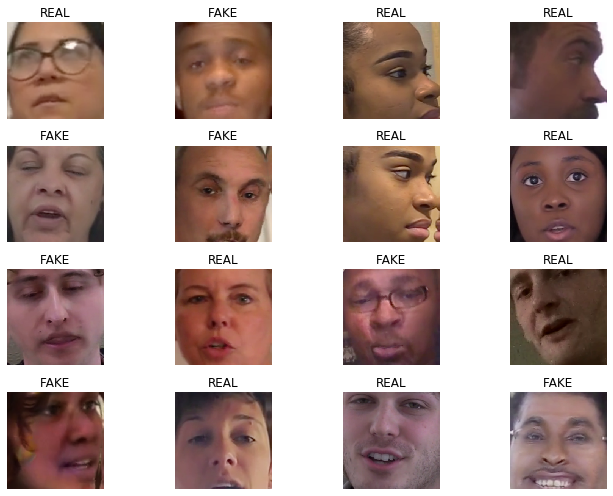

In [7]:
data.show_batch(rows=4, figsize=(10,7))

In [8]:
learner = cnn_learner(data, resnet18, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


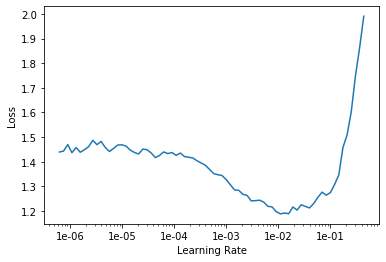

In [9]:
learner.lr_find()
learner.recorder.plot()

In [10]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.064774,0.699860,0.668354,00:05
1,0.799097,0.507129,0.751899,00:05
2,0.614859,0.451851,0.807595,00:05
3,0.477019,0.443342,0.820253,00:05
4,0.424481,0.459227,0.810127,00:05


In [12]:
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.340246,0.424850,0.822785,00:06
1,0.351370,0.434370,0.830380,00:05
2,0.263741,0.399279,0.837975,00:05
3,0.253444,0.508251,0.810127,00:06
4,0.217461,0.420009,0.845570,00:05
5,0.153514,0.802319,0.802532,00:05
6,0.124072,0.654469,0.820253,00:06
7,0.115183,0.507516,0.830380,00:06
8,0.070523,0.568567,0.837975,00:06
9,0.060502,0.520474,0.848101,00:06


So we're getting ~88% accuracy. Not too bad for a first try.

## Throw a much larger network at the problem

OpenAI tells us ["Use Bigger Networks"](https://openai.com/blog/deep-double-descent/) even when you're overfitting! Let's try!

In [17]:
data = get_data(32, 256)

In [18]:
learner = cnn_learner(data, resnet101, metrics=[accuracy])

In [19]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.859650,0.777384,0.749367,00:17
1,0.683695,0.793835,0.759494,00:15
2,0.463941,0.450132,0.827848,00:15
3,0.297754,0.475286,0.848101,00:15
4,0.213455,0.480851,0.840506,00:15


In [20]:
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.174777,0.453006,0.858228,00:21
1,0.138853,0.456777,0.848101,00:20
2,0.116206,0.607030,0.789873,00:20
3,0.156488,0.671139,0.800000,00:20
4,0.157176,0.655162,0.835443,00:20
5,0.155970,0.335049,0.870886,00:20
6,0.106956,0.462019,0.886076,00:20
7,0.067203,0.841912,0.787342,00:20
8,0.063004,0.559311,0.850633,00:20
9,0.064680,0.299002,0.901266,00:20


This didn't seem to do much better, but it peaked at 90% accuracy.

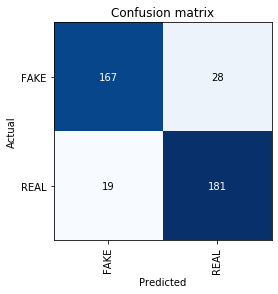

In [22]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

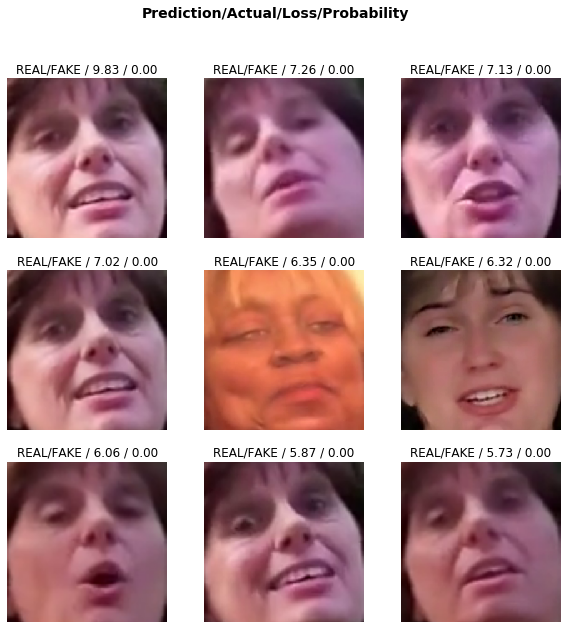

In [24]:
interp.plot_top_losses(9, figsize=(10,10))